# Исследование надёжности заёмщиков
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

План работы:

 - Обзор данных

 - Предобработка данных

 - Ответы на основные вопросы заказчика исследования:
   - Есть ли зависимость между наличием детей и возвратом кредита в срок?
   - Есть ли зависимость между семейным положением и возвратом кредита в срок?
   - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
   - Как разные цели кредита влияют на его возврат в срок?
 - Результаты:
   - Выводы
   - Рекомендации


### 1. Откройте таблицу и изучите общую информацию о данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

df = pd.read_csv('/datasets/data.csv')


 Посмотрим на датасет

In [2]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Вывод**

После знакомства с данными имеем следующие проблемы:

 - аномальные значения в `days_employed` и `children`
 - `days_employed` можно перевести в года для удобства 
 - пропуски в `days_employed` и `total_income`
 - будет корректно привести `total_income` к целым значениям
 - в `dob_years`присутствуют нулевые значения
 - разный регистр букв



### 2. Предобработка данных

Посчитаем количество пропусков

In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

На уровень дохода больше всего влияет тип занятости, поэтому заполним пропуски медианным значением по каждому типу и изменим тип данных.


In [6]:
df['total_income'] = (df['total_income']
                      .fillna(df.groupby('income_type')['total_income']
                              .transform('median')))
df['total_income'] = df['total_income'].astype('int')
display(df['total_income'])
display(df['total_income'].dtype)

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int32

dtype('int32')

Обработаем отрицательные значения в `days_employed`

In [7]:
df['days_employed'] = df['days_employed'].abs()

Пропуски в столбце `days_employed` медианными значениями по каждому типу занятости. Переведем данные из дней в года, изменим тип данных и переименуем столбец

In [8]:
df['days_employed'] = (df['days_employed']
                      .fillna(df.groupby('income_type')['days_employed']
                              .transform('median')))

df['days_employed'] = df['days_employed'] / 365
df['days_employed'] = df['days_employed'].astype('int')
df = df.rename(columns={'days_employed':'years_employed'})


In [9]:
df

,children,years_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,15,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,932,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,12,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,942,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,5,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,8,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


Посмотрим на распределение данных в  `children`

In [10]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Количество аномальных значение в `children` достаточно мало, поэтому можно удалить эти данные из датафрейма

In [11]:
df = df[~df['children'].isin([-1,20])]
df['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Проверим пропуски

In [12]:
df.isna().sum()

children            0
years_employed      0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Приведем данные в `education` и `family_status` к нижнему регистру

In [13]:
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

Посчитаем количество явных дублей, сли такие есть - то удалим их

In [14]:
df.duplicated().sum()

71

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

0

**Для дальнешего анализа необходимо разбить данные по доходам и целям кредита на группы**

In [16]:
df['total_income'].quantile([0.25,0.5,0.75])

0.25    107507.0
0.50    142594.0
0.75    195842.0
Name: total_income, dtype: float64

Напишем функцию для категоризации доходов

In [37]:
def categorize_income(income):
    if  income <= 107507:
        return 'Низкий доход'
    elif income <= 142594:
        return 'Средний доход'
    elif  income <= 195842:
        return 'Высокий доход'
    else:
        return 'Сверхвысокий доход'
    
    

Создадим новый столбец с категориям доходов

In [38]:
df['total_income_category'] = df['total_income'].apply(categorize_income)

Посмотрим на уникальные цели взятия кредита 

In [19]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Визуально выделяются следующие цели:
* свадьба
* недвижимость/жилье
* автомобиль
* образование
 
Напишем функцию, которая разобьет данные на следующие группы:
 
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
df['purpose_category'] = df['purpose'].apply(categorize_purpose)

###  3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
debt = df.groupby('children')['debt'].agg(['sum','count']).reset_index() 
debt = debt.rename(columns={'sum' : 'prosrochki' ,'count' : 'all' })
debt['in_time'] = debt['all'] - debt['prosrochki']
debt['proc'] = debt['prosrochki'] / debt['all'] * 100
debt = debt.sort_values('proc',ascending=True)
debt


,children,prosrochki,all,in_time,proc
5,5,0,9,9,0.000000
0,0,1063,14091,13028,7.543822
3,3,27,330,303,8.181818
1,1,444,4808,4364,9.234609
2,2,194,2052,1858,9.454191
4,4,4,41,37,9.756098


<AxesSubplot:xlabel='children', ylabel='proc'>

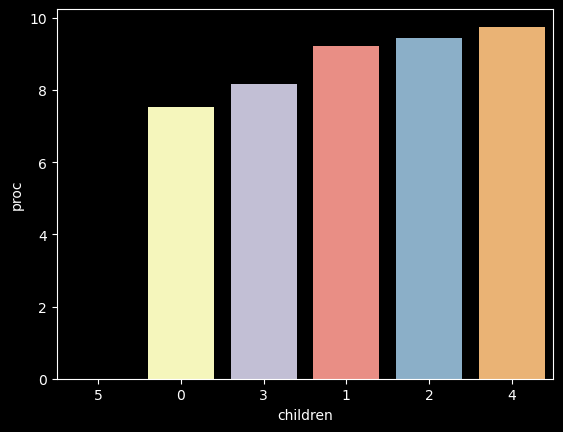

In [33]:

sns.barplot(x='children', y='proc', data=debt, order=debt.sort_values('proc').children)

In [40]:
df['children'].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

**Вывод:** Менее надежным заемщики являются клиенты с 1-2 детьми, а самыми надежными клиенты без детей. Опираться на результаты клиентов с 3-5 детьми не совсем корректтно, так как таких клиентов в базе значительно меньше, чем других.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [24]:
a = df.groupby('family_status')['debt'].agg(['sum', 'count']).reset_index()
a['proc'] = a['sum'] / a['count'] * 100
a = a.sort_values('proc',ascending=True)
a

,family_status,sum,count,proc
1,вдовец / вдова,63,951,6.624606
0,в разводе,84,1189,7.064760
3,женат / замужем,927,12261,7.560558
2,гражданский брак,385,4134,9.313014
4,не женат / не замужем,273,2796,9.763948


<AxesSubplot:xlabel='proc', ylabel='family_status'>

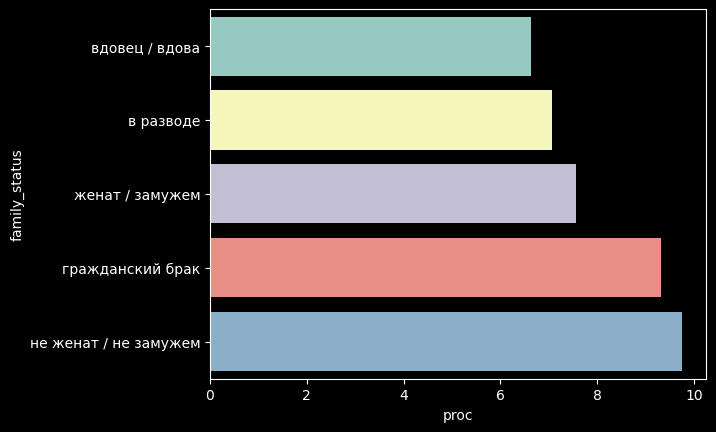

In [34]:

sns.barplot(x=a['proc'], y=a['family_status'])

**Вывод:** По результатам, самми надежными заемщками являются вдовы/вдовцы, а самыми ненадежными - 
не женатые / не замужные 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [26]:
cred = df.groupby('total_income_category')['debt'].agg(['sum', 'count']).reset_index()
cred['proc'] = cred['sum'] / cred['count'] * 100
cred = cred.sort_values('proc',ascending=True)
cred

,total_income_category,sum,count,proc
2,Сверхвысокйи доход,381,5332,7.145536
1,Низкий доход,427,5333,8.006750
0,Высокий доход,444,5216,8.512270
3,Средний доход,480,5450,8.807339


<AxesSubplot:xlabel='total_income_category', ylabel='proc'>

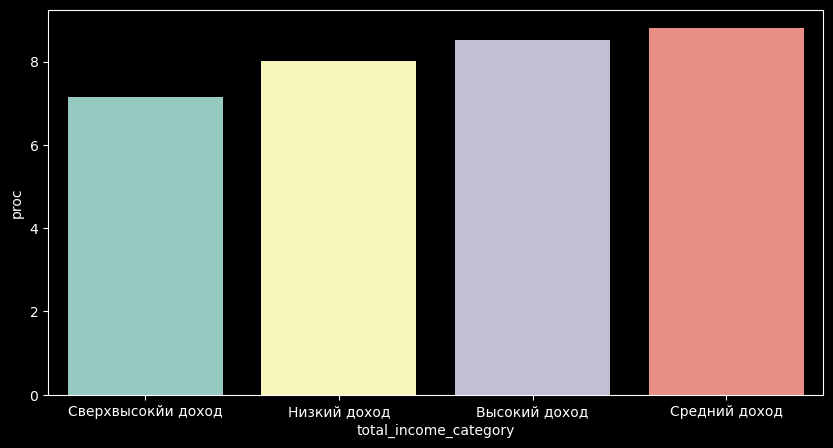

In [39]:

plt.figure(figsize=(10,5))
sns.barplot(x=cred['total_income_category'], y=cred['proc'])

**Вывод:** По результатам надежными заещиками являются клиенты с сверхвысокими и  низкими доходами

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Группируме данные по цели кредита**

In [28]:
purp = df.groupby('purpose_category')['debt'].agg(['sum','count',]).reset_index()



<AxesSubplot:ylabel='purpose_category'>

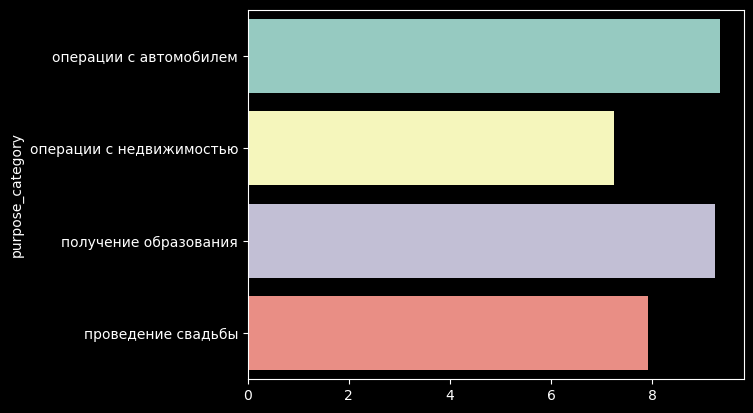

In [29]:
sns.barplot(x=purp['sum'] / purp['count'] * 100, y=purp['purpose_category'])

**Вывод:** Такие цели заема как `операция с автомобилем` и `получение образования` являются самыми ненадежными. самыми надежными являются `операции с недвижимостью`

#### Средняя просрочка по базе

In [32]:
print(round(len(df.query('debt ==1')) / df.shape[0] * 100, 2))

8.12


### Шаг 4: общий вывод.

Наши изыскания находятся в диапазоне +-2% относительно средней величины задолженности, что может иметь большое значение при большом обороте.

На основе данного исследования можно выделить группы риска: 
 * клиентов с семейным статусом `не женатые / не замужные ` и `гражданский брак`
 * клиент с 1-2 детьми
 Для данных клиентова стоит применить защитные механизмы, такие как страховка от невыплат или повышенная ставка.<br>
 Также такие механизмы можно применить для категорий клиентов с 3-5 детьми до момента пока данных о таких клиентов не будет достаточно для корректного исследования. После чего стоит пересмотреть использование защитных механизмов на данной группе.
 
В дополнении ко всему, полученные можно использовать для выделения целевой аудитории в рекламных кампаниях.
